In [1]:
import cirq
import numpy as np

In [2]:
### a) intialise with 5 qubits
qubits = [cirq.GridQubit(0, i) for i in range(5)]
print(qubits)

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4)]


In [3]:
### b) apply hadamard on every gate
qc = cirq.Circuit()
qc.append(cirq.H(q) for q in qubits)
print(qc)

(0, 0): ───H───

(0, 1): ───H───

(0, 2): ───H───

(0, 3): ───H───

(0, 4): ───H───


In [4]:
### c) apply CNOT/CX on qubits (format assumed: (control, target)) (q0, q1), (q1, q2), (q2, q3), (q3, q4)
qc.append(cirq.CNOT(qubits[i],qubits[j]) for i in range(0,len(qubits)) for j in range(0,len(qubits)) if j==i+1)
print(qc)

(0, 0): ───H───@───────────────
               │
(0, 1): ───H───X───@───────────
                   │
(0, 2): ───H───────X───@───────
                       │
(0, 3): ───H───────────X───@───
                           │
(0, 4): ───H───────────────X───


In [5]:
### d) apply SWAP on (q0,q4)
qc.append(cirq.SWAP(qubits[0],qubits[4]))
print(qc)

(0, 0): ───H───@───────────────×───
               │               │
(0, 1): ───H───X───@───────────┼───
                   │           │
(0, 2): ───H───────X───@───────┼───
                       │       │
(0, 3): ───H───────────X───@───┼───
                           │   │
(0, 4): ───H───────────────X───×───


In [6]:
### e) rotate X with pi/2
gate = cirq.rx(np.pi/2)
qc.append(gate.on(qubits[0]))
#qc.append(cirq.X(qubits[0])**(np.pi/2))
print(qc)

(0, 0): ───H───@───────────────×───Rx(0.5π)───
               │               │
(0, 1): ───H───X───@───────────┼──────────────
                   │           │
(0, 2): ───H───────X───@───────┼──────────────
                       │       │
(0, 3): ───H───────────X───@───┼──────────────
                           │   │
(0, 4): ───H───────────────X───×──────────────


(0, 1): ───Rx(0.006π)───M('1')───
Probabilty measured: 


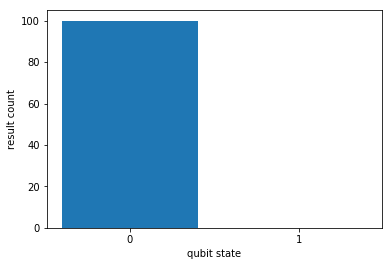

(0, 1): ───Rx(0.006π)───M('1')───Rx(0.011π)───M('2')───
Probabilty measured: 


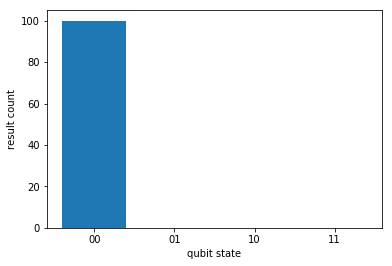

(0, 1): ───Rx(0.006π)───M('1')───Rx(0.011π)───M('2')───Rx(0.017π)───M('3')───
Probabilty measured: 


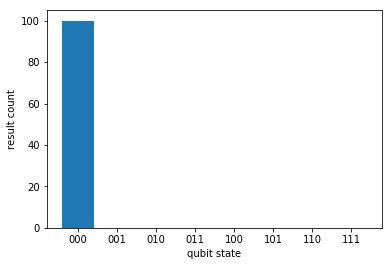

(0, 1): ───Rx(0.006π)───M('1')───Rx(0.011π)───M('2')───Rx(0.017π)───M('3')───Rx(0.022π)───M('4')───
Probabilty measured: 


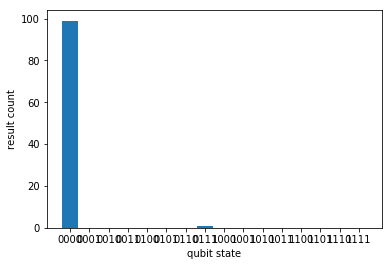

In [7]:
### 2) circuit that is a series of small cirq.Rx rotations 
###    and plot the probability of measuring the state in the |0⟩ state
simulator = cirq.Simulator()
quantumCircuit = cirq.Circuit()
for i in range(1,5):
    qubit = cirq.GridQubit(0,1)
    gate = cirq.rx((np.pi/180)*i)
    quantumCircuit.append(gate.on(qubit))
    quantumCircuit.append(cirq.measure(qubit, key=i))
    print(quantumCircuit)
    print("Probabilty measured: ")
    results = simulator.run(quantumCircuit, repetitions=100)
    cirq.plot_state_histogram(results)